In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib
from scipy.signal import savgol_filter 
import re

# MFD

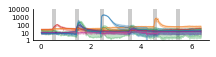

In [2]:
# Load summarized SNR data (mean and std per sensor)
summary_df = pd.read_csv('SNR.csv')

# Initialize figure and axis
fig = plt.figure(figsize=(3.1, 0.9))
ax = fig.add_subplot(1, 1, 1)

# Color palette for sensors
colors = ['#D52B29', '#2F9F48', '#C33F97', '#F37F20', '#2278B5', '#67318D']

# Plot styling
lw = 0.5
window = 5    # Savitzky–Golay window size (odd, <= data length)
poly = 3      # Polynomial order for smoothing

# Time axis (minutes)
t = np.arange(0, 919) / 6

# Plot sensor means with ±1 std shaded region
ax.plot(t, savgol_filter(summary_df['arsR_mean'], window, poly),
        color=colors[0], linewidth=lw, zorder=2)
ax.fill_between(t,
                savgol_filter(summary_df['arsR_mean'], window, poly) - summary_df['arsR_std'],
                savgol_filter(summary_df['arsR_mean'], window, poly) + summary_df['arsR_std'],
                color=colors[0], alpha=0.3, zorder=1)

ax.plot(t, savgol_filter(summary_df['zntA_mean'], window, poly),
        color=colors[1], linewidth=lw, zorder=2)
ax.fill_between(t,
                savgol_filter(summary_df['zntA_mean'], window, poly) - summary_df['zntA_std'],
                savgol_filter(summary_df['zntA_mean'], window, poly) + summary_df['zntA_std'],
                color=colors[1], alpha=0.3, zorder=1)

ax.plot(t, savgol_filter(summary_df['zraP_mean'], window, poly),
        color=colors[2], linewidth=lw, zorder=2)
ax.fill_between(t,
                savgol_filter(summary_df['zraP_mean'], window, poly) - summary_df['zraP_std'],
                savgol_filter(summary_df['zraP_mean'], window, poly) + summary_df['zraP_std'],
                color=colors[2], alpha=0.3, zorder=1)

ax.plot(t, savgol_filter(summary_df['cusC_mean'], window, poly),
        color=colors[3], linewidth=lw, zorder=2)
ax.fill_between(t,
                savgol_filter(summary_df['cusC_mean'], window, poly) - summary_df['cusC_std'],
                savgol_filter(summary_df['cusC_mean'], window, poly) + summary_df['cusC_std'],
                color=colors[3], alpha=0.3, zorder=1)

ax.plot(t, savgol_filter(summary_df['merR_mean'], window, poly),
        color=colors[4], linewidth=lw, zorder=2)
ax.fill_between(t,
                savgol_filter(summary_df['merR_mean'], window, poly) - summary_df['merR_std'],
                savgol_filter(summary_df['merR_mean'], window, poly) + summary_df['merR_std'],
                color=colors[4], alpha=0.3, zorder=1)

ax.plot(t, savgol_filter(summary_df['cadC_mean'], window, poly),
        color=colors[5], linewidth=lw, zorder=2)
ax.fill_between(t,
                savgol_filter(summary_df['cadC_mean'], window, poly) - summary_df['cadC_std'],
                savgol_filter(summary_df['cadC_mean'], window, poly) + summary_df['cadC_std'],
                color=colors[5], alpha=0.3, zorder=1)

# Add exposure windows (gray shaded rectangles)
for x in [61, 196, 338, 500, 644, 776]:
    rect = Rectangle((x/6, -10), 4, 100000,
                     color='gray', alpha=0.4, linewidth=0, zorder=0)
    ax.add_patch(rect)

# Axis scaling and limits
plt.yscale('log')
plt.ylim(2, 10000)

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Tick formatting
xticks = [0, 48, 96, 144]
yticks = [1, 10, 100, 1000, 10000]

plt.xticks(xticks)
ax.set_xticklabels([0, 2, 4, 6], fontsize=7)

plt.yticks(yticks)
ax.set_yticklabels(yticks, fontsize=7)

ax.tick_params(axis='both', length=0)

plt.tight_layout()
